## Группа DS03-onl

Студент Парфимович Алексей

## Домашнее задание №20

Работа с временными рядами.  
Известно ежемесячное число смертей в результате случайного случая в США с января 1973 по декабрь 1978,  
необходимо построить прогноз на следующие 2 года. 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

from prophet import Prophet
from neuralprophet import NeuralProphet
from sklearn.metrics import mean_squared_error

%matplotlib inline
from matplotlib import pyplot as plt
plt.rcParams["figure.figsize"] = (18, 5)

RANDOM_STATE = 42

Загрузить данные.

In [2]:
df = pd.read_csv('accidental-deaths-in-usa-monthly.csv',
                   index_col=['Month'], parse_dates=['Month'])

# Сбросить индекс
df.reset_index(inplace=True)
# Переименовать столбцы для удобства работы
df.rename(columns={"Month": "ds", "Accidental deaths in USA: monthly, 1973 ? 1978": "y"}, inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      72 non-null     datetime64[ns]
 1   y       72 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.2 KB


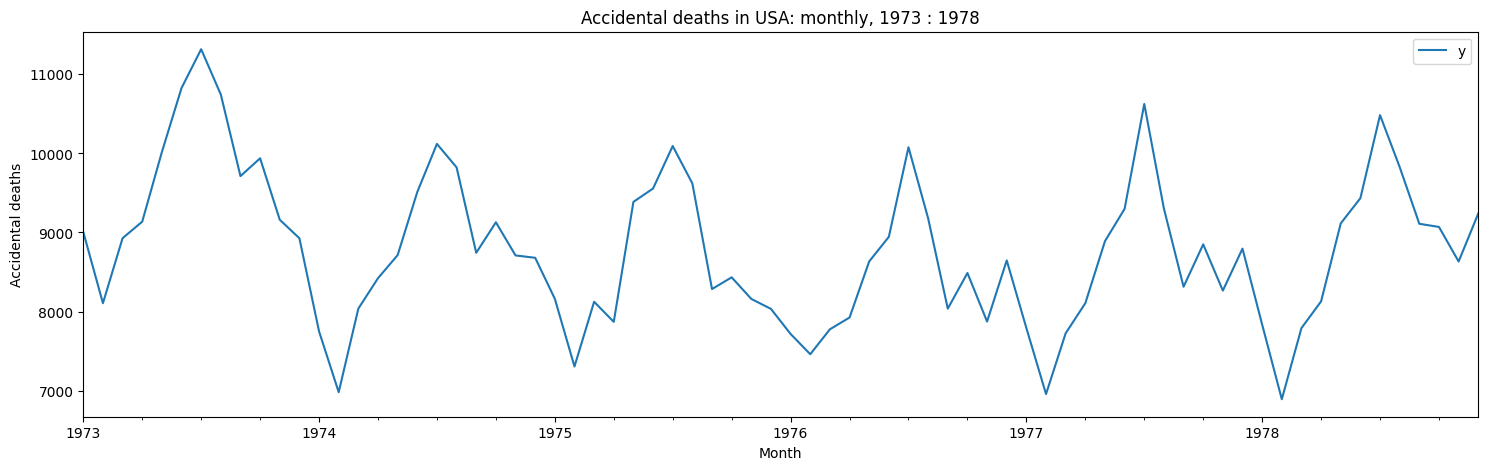

In [3]:
df.plot(x='ds', y='y', title='Accidental deaths in USA: monthly, 1973 : 1978');
plt.ylabel('Accidental deaths');
plt.xlabel('Month');

Подготовить данные для обучения.

In [4]:
test_length = 12
df_train = df.iloc[:-test_length]
df_test = df.iloc[-test_length:]

df_test

,ds,y
60,1978-01-01,7836
61,1978-02-01,6892
62,1978-03-01,7791
63,1978-04-01,8129
64,1978-05-01,9115
65,1978-06-01,9434
66,1978-07-01,10484
67,1978-08-01,9827
68,1978-09-01,9110
69,1978-10-01,9070


### Prophet

In [5]:
pr = Prophet()
pr.fit(df_train)

# Cоздание «future dataframe» для получения прогноза на заданное количество месяцев (test_length)
df_future_1 = pr.make_future_dataframe(periods=test_length, freq='M')

df_future_1[-test_length:]

11:02:21 - cmdstanpy - INFO - Chain [1] start processing
11:02:22 - cmdstanpy - INFO - Chain [1] done processing


,ds
60,1977-12-31
61,1978-01-31
62,1978-02-28
63,1978-03-31
64,1978-04-30
65,1978-05-31
66,1978-06-30
67,1978-07-31
68,1978-08-31
69,1978-09-30


__Этот кривой метод создает интервал для прогноза из последних дней месяцев вместо первых!  
Из-за этого получившийся интервал не будет полностью идентичен интервалу тестового набора данных df_test :(__

Выполним прогнозирование значений для созданного «future dataframe»  
и визуализацию исторических и прогнозных значений

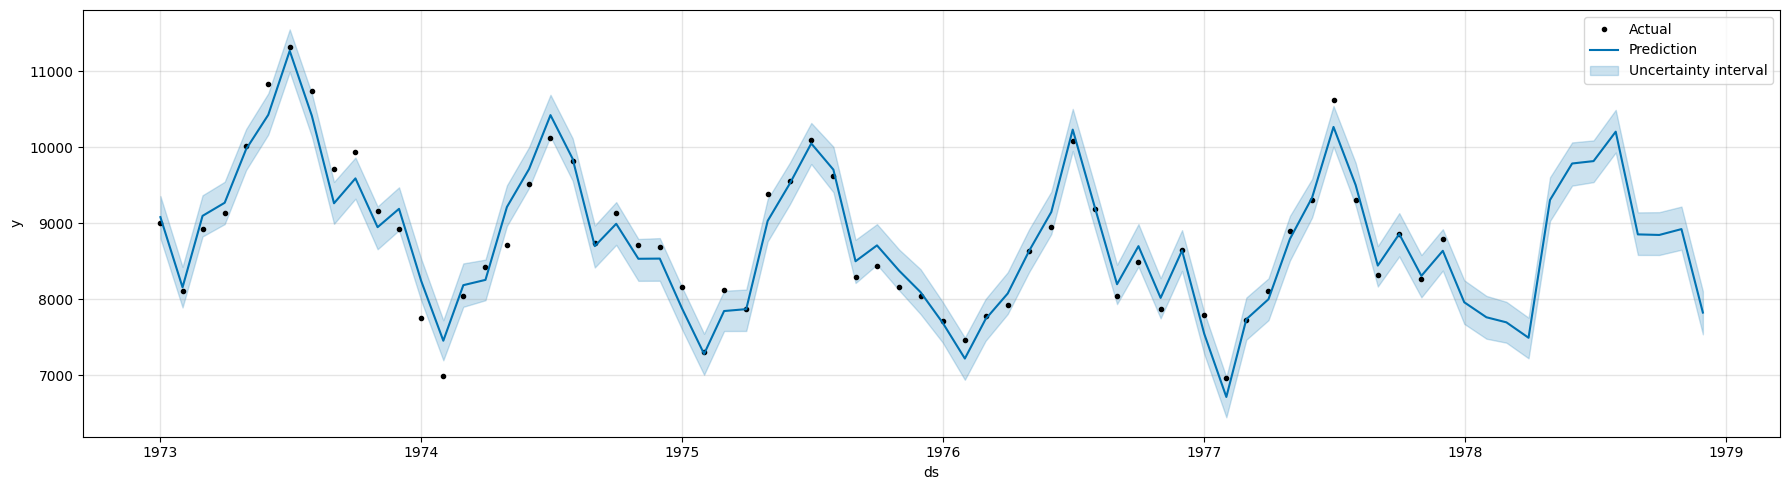

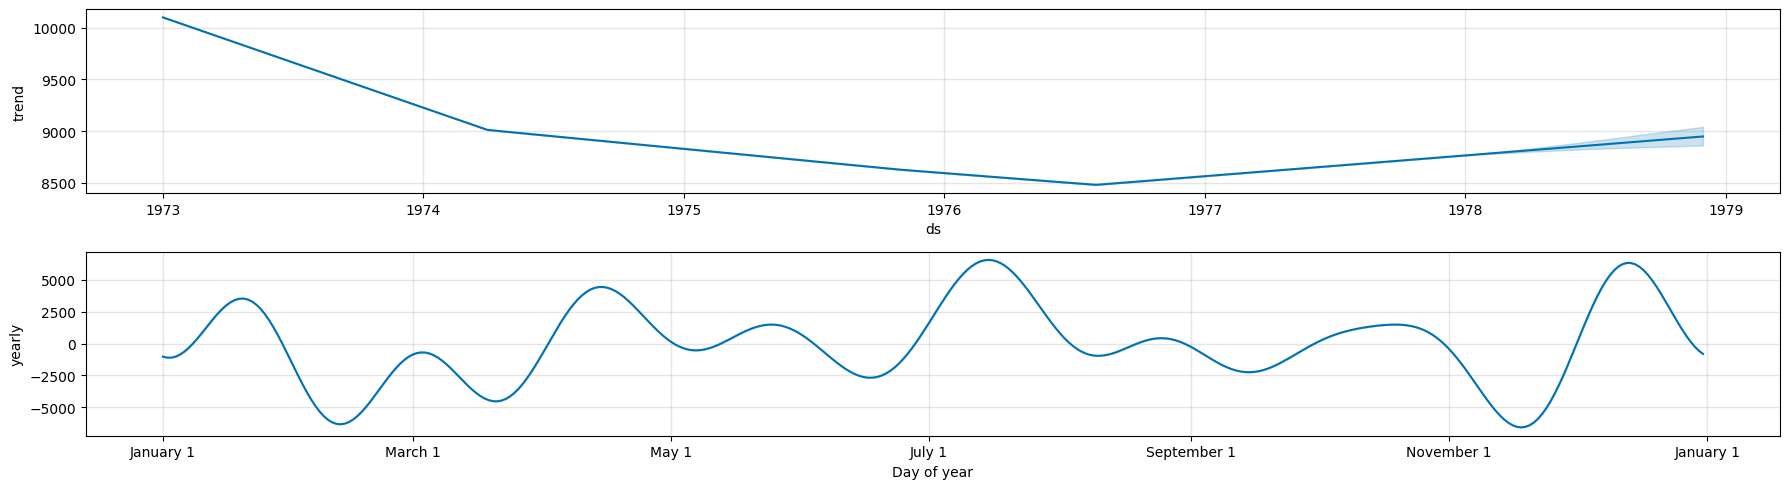

In [6]:
# Получение прогноза для «future dataframe»
df_preds_1 = pr.predict(df_future_1)

# Визуалиация «исторических» и прогнозных данных
pr.plot(df_preds_1, figsize=(18,5))
plt.legend(['Actual', 'Prediction', 'Uncertainty interval'])

pr.plot_components(df_preds_1, figsize=(18,5));

### Neural Prophet

In [7]:
npr = NeuralProphet()
npr.fit(df_train, freq="M") # "M" - месячный интервал

# Cоздание «future dataframe» для получения прогноза на заданное количество месяцев (test_length)
df_future_2 = npr.make_future_dataframe(df_train, # набор данных для построения прогноза
                                        periods = test_length, # количество периодов для построения прогноза
                                        n_historic_predictions=len(df_train) # длина выборки - включаем все исторические данные
                                      )

INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to 90.0% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling weekly seasonality. Run NeuralProphet with weekly_seasonality=True to override this.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 16
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 759
WARNING - (NP.config.set_lr_finder_args) - Learning rate finder: The number of batches (4) is too small than the required number for the learning rate finder (205). The results might not be optimal.


Finding best initial lr:   0%|          | 0/205 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to 90.0% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column


INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to 90.278% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS
INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to 90.278% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS


Predicting: 4it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (NP.plotting.log_warning_deprecation_plotly) - DeprecationWarning: default plotting_backend will be changed to plotly in a future version. Switch to plotly by calling `m.set_plotting_backend('plotly')`.
WARNING - (NP.plotting.log_warning_deprecation_plotly) - DeprecationWarning: default plotting_backend will be changed to plotly in a future version. Switch to plotly by calling `m.set_plotting_backend('plotly')`.


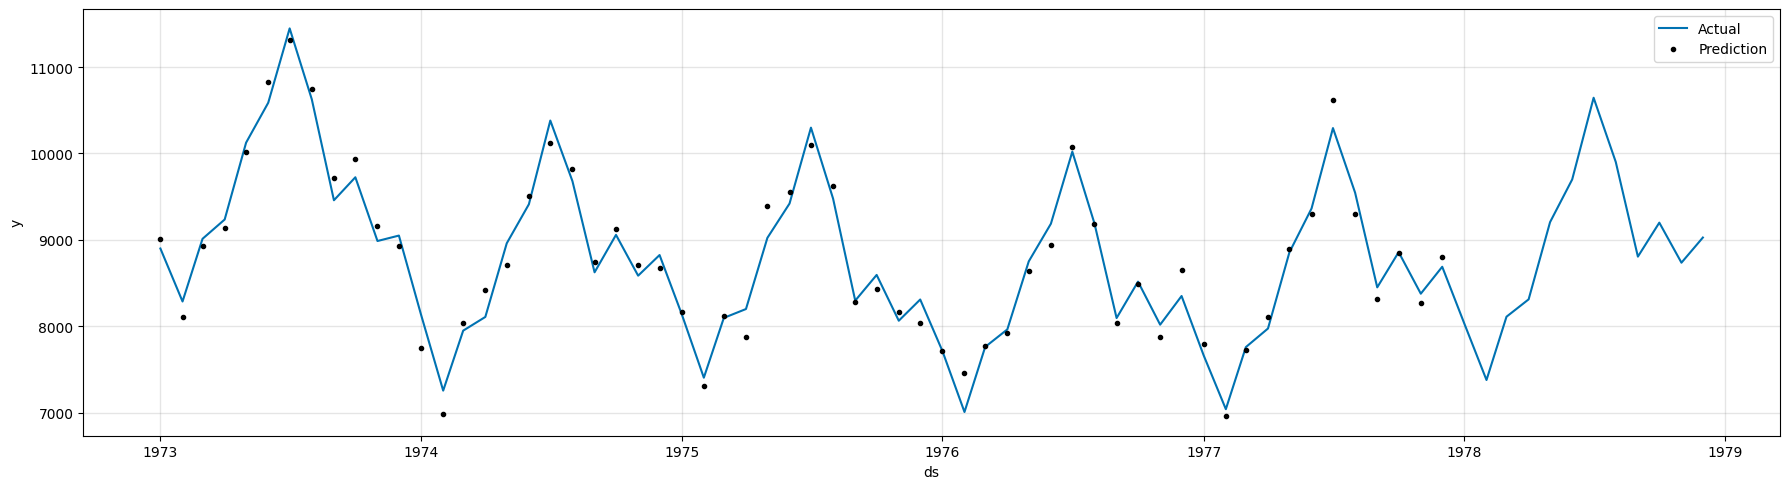

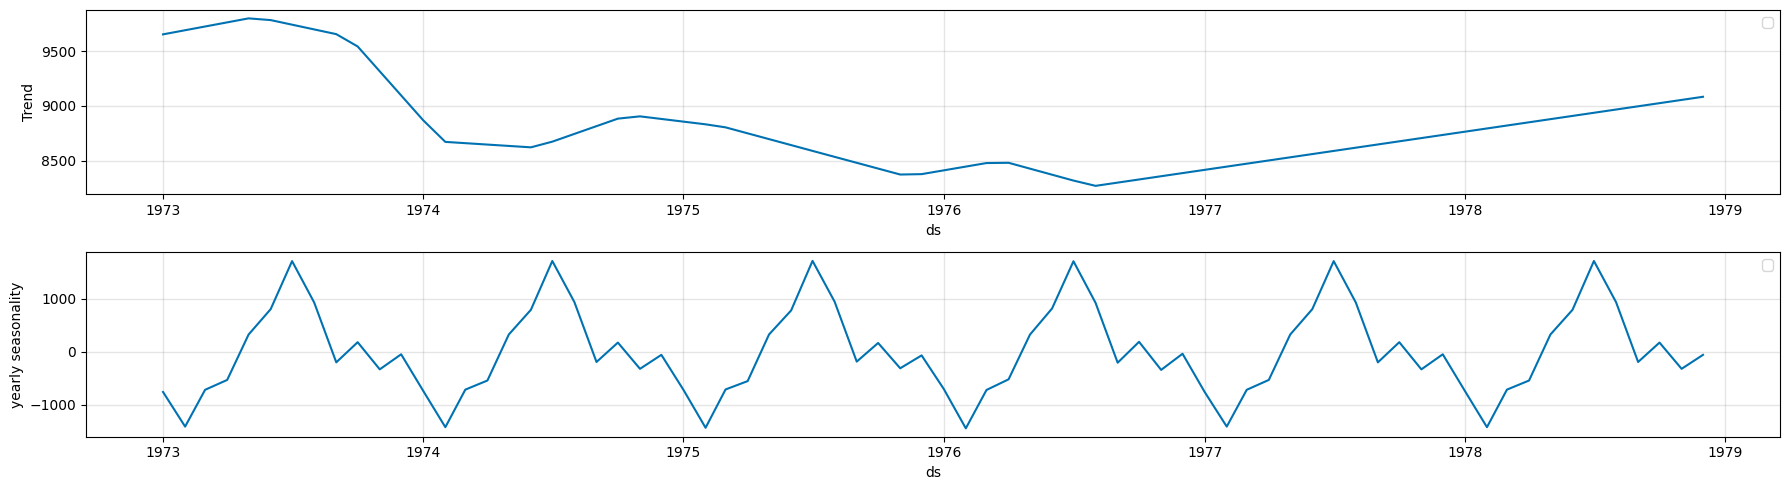

In [8]:
# Получение прогноза
df_preds_2 = npr.predict(df_future_2)

# Визуалиация «исторических» и прогнозных данных
npr.plot(df_preds_2, figsize=(18,5))
plt.legend(['Actual', 'Prediction'])

npr.plot_components(df_preds_2, figsize=(18,5));

Сравним результаты работы построенных моделей и тестовой выборки данных

Сравнение значений MSE
Prophet:	345283.1239
NeuralProphet:	56969.4641


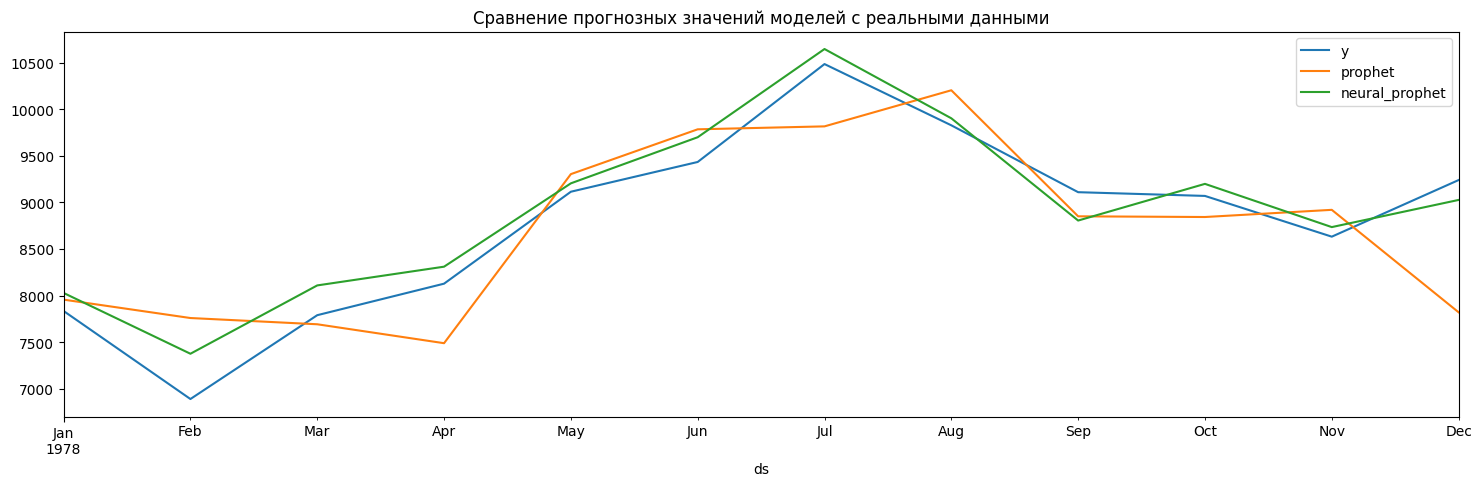

In [9]:
# Помещаем полученные прогнозы по обеим моделям в тестовый DataFrame
df_test['prophet'] = df_preds_1[-test_length:]['yhat']
df_test['neural_prophet'] = df_preds_2[-test_length:]['yhat1']
df_test.set_index('ds', inplace=True)

print('Сравнение значений MSE')
print(f"Prophet:\t{mean_squared_error(df_test['y'], df_preds_1[-test_length:]['yhat']):.4f}")
print(f"NeuralProphet:\t{mean_squared_error(df_test['y'], df_preds_2[-test_length:]['yhat1']):.4f}")

df_test.plot(title='Сравнение прогнозных значений моделей с реальными данными');

#### Вывод: Модель NeuralProphet показывает на порядок лучую точность чем модель Prophet

## Построим прогноз на последующие 2 года

INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to 90.278% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling weekly seasonality. Run NeuralProphet with weekly_seasonality=True to override this.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 16
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 668
WARNING - (NP.config.set_lr_finder_args) - Learning rate finder: The number of batches (5) is too small than the required number for the learning rate finder (205). The results might not be optimal.


Finding best initial lr:   0%|          | 0/205 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to 90.278% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to 90.625% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS
INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to 90.625% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS


Predicting: 5it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (NP.plotting.log_warning_deprecation_plotly) - DeprecationWarning: default plotting_backend will be changed to plotly in a future version. Switch to plotly by calling `m.set_plotting_backend('plotly')`.


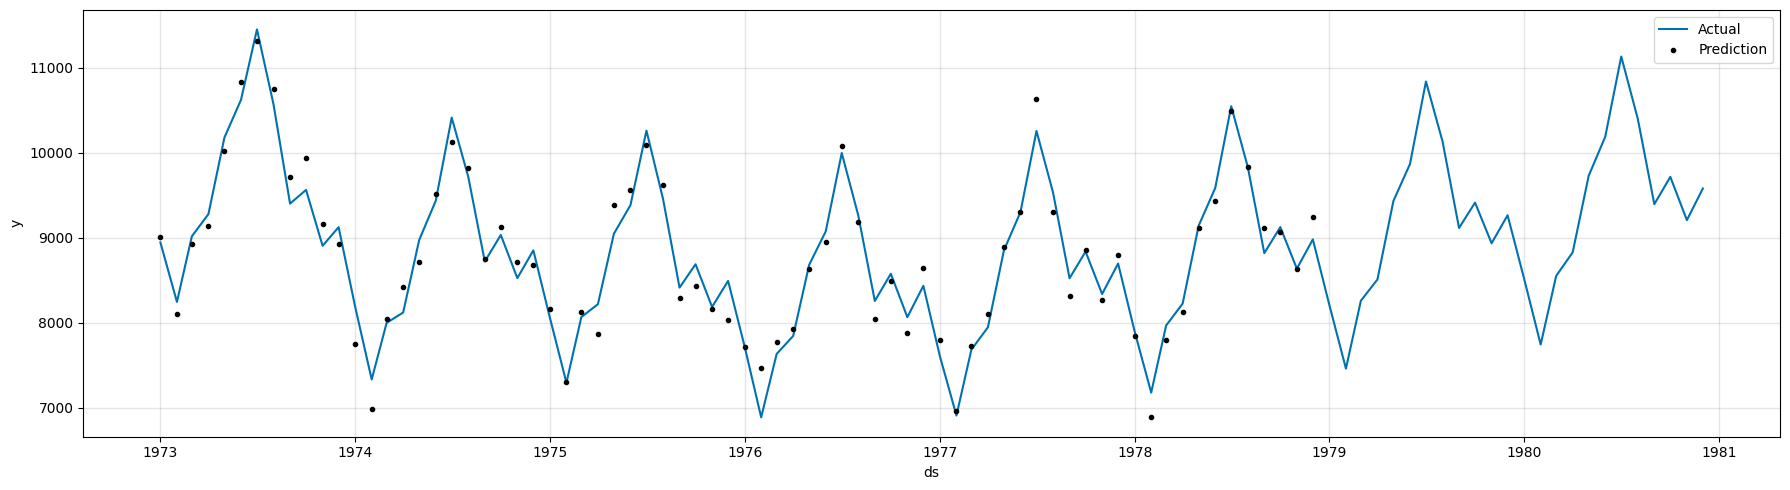

In [10]:
npr = NeuralProphet()
npr.fit(df, freq="M")

df_future_3 = npr.make_future_dataframe(df,
                                        periods = 24, # прогноз на 2 года (24 месяца)
                                        n_historic_predictions=len(df) # включаем все исторические данные
                                      )

# Получение прогноза
df_preds_3 = npr.predict(df_future_3)

# Визуалиация «исторических» и прогнозных данных
npr.plot(df_preds_3, figsize=(18,5))
plt.legend(['Actual', 'Prediction'])